In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    accuracy_train = []
    accuracy_test = []
    f1 = []
    recall = []  
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))  
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score_1": np.mean(f1),
        "Recall_1": np.mean(recall), 
        "ROC-AUC_1": np.mean(roc_auc),
    }

# Pfad zur Datei
file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"

try:
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    
    # Dummy-Variable "Geschlecht_weiblich" separieren
    if 'Geschlecht_weiblich' in df.columns:
        geschlecht_weiblich = df[['Geschlecht_weiblich']]
        X = df.drop(columns=['Verletzungsstatus', 'Geschlecht_weiblich'])
    else:
        X = df.drop(columns=['Verletzungsstatus'])
        geschlecht_weiblich = None  # Falls die Spalte fehlt

    # Skalierung der Features (ohne "Geschlecht_weiblich")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Falls vorhanden, die Dummy-Variable wieder anhängen
    if geschlecht_weiblich is not None:
        X_scaled = np.hstack((X_scaled, geschlecht_weiblich.values))

    # Modelle definieren
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(random_state=42),
    }

    results = []
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  
        results.append({"Model": model_name, **metrics})

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC_1", ascending=False)

    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Logistic Regression
Modell wird validiert: Decision Tree
Modell wird validiert: Random Forest
Modell wird validiert: Gradient Boosting
Modell wird validiert: XGBoost
Modell wird validiert: LightGBM


C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

Modell wird validiert: SVC
Modell wird validiert: k-Nearest Neighbors
Modell wird validiert: MLP Classifier
Modell wird validiert: Gaussian Naive Bayes
Modell wird validiert: Linear Discriminant Analysis
Modell wird validiert: Quadratic Discriminant Analysis


C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of param

Modell wird validiert: Bagging Classifier
Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
                              Model  Train Accuracy  Test Accuracy  F1-Score_1  Recall_1  ROC-AUC_1
0               Logistic Regression        1.000000       0.888577    0.892229  0.871795   0.973186
8                    MLP Classifier        1.000000       0.882490    0.887778  0.875513   0.958321
6                               SVC        0.977663       0.844387    0.855196  0.855769   0.938479
4                           XGBoost        1.000000       0.830040    0.834000  0.801282   0.931310
13                      Extra Trees        1.000000       0.823202    0.833244  0.825256   0.925237
3                 Gradient Boosting        1.000000       0.836482    0.842927  0.815897   0.923965
2                     Random Forest        1.000000       0.817154    0.827727  0.821026   0.919907
5                          LightGBM        1.000000       0.815889    0.820686  0.793077   0.91257

Feature Selektion auf Basis von Feature Importance (Random Forest) und Korrelationsmatrix r < 0,7

Hochkorrelierte Features (r > 0.7):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Jump Height impulse mit Korrelation: 0.71
CMJ_Jump Height flighttime und CMJ_RSI (impulse) mit Korrelation: 0.77
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Peak Loading Force-Mittelwert [N] mit Korrelation: 0.70
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flight

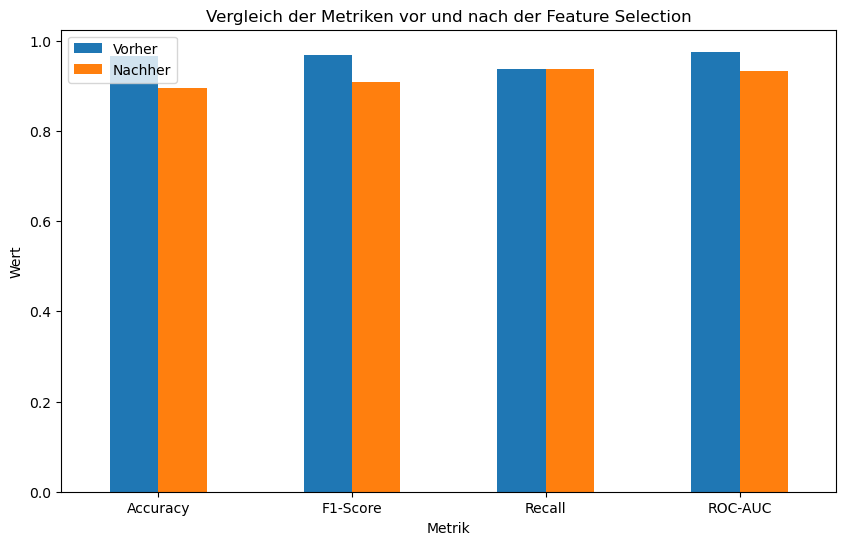

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))
X_test_scaled = scaler.transform(X_test.drop(columns=dummy_columns))

# Dummies wieder hinzufügen
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Bereite X_train_final und X_test_final vor
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
X_test_final = np.array(X_test_final)   # Für spätere Validierung
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Erstelle DataFrame mit Feature-Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Datensatz
df_reduced = df.drop(columns=features_to_drop)

# Speichere den gesamten reduzierten Datensatz
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_korr_70_feature_importance.xlsx"
df_reduced.to_excel(output_path, index=False)
print(f"Der gesamte reduzierte Datensatz wurde unter folgendem Pfad gespeichert: {output_path}")

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection
train_metrics_original, test_metrics_original = validate_feature_selection(
    rf, 
    X_train_final, 
    y_train, 
    X_test_final, 
    y_test
)

# Reduziertes Training und Test-Set erstellen (nur reduzierte Features verwenden)
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Skalierung der reduzierten numerischen Features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced.drop(columns=dummy_columns))
X_test_reduced_scaled = scaler.transform(X_test_reduced.drop(columns=dummy_columns))
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, X_train_reduced[dummy_columns].values], axis=1)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test_reduced[dummy_columns].values], axis=1)

# Validierung nach der Feature Selection
train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original["Test Accuracy"], 
        test_metrics_original["F1-Score"], 
        test_metrics_original["Recall"], 
        test_metrics_original["ROC-AUC"]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)

# Visualisierung des Vergleichs
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


In [3]:
!git add FS_70_feature_importance.ipynb

In [5]:
!git commit -m "Feature Selektion Step 1"

[master 99ce827] Feature Selektion Step 1
 1 file changed, 246 insertions(+), 596 deletions(-)


In [7]:
!git push origin master

To https://github.com/michi1308/ML_jupyter_notebook.git
   300019f..99ce827  master -> master


In [ ]:
innerer und äußere cv, zwei separate skripte und einen dritten zum direkten vergleich der metriken
repeated stratified cv verwenden 

In [5]:
!git add FS_70_feature_importance.ipynb
!git commit "feature selection und hyperparameter"
!git push origin master

error: pathspec 'feature selection und hyperparameter' did not match any file(s) known to git
Everything up-to-date


In [ ]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict, Counter
from IPython.display import display, HTML

optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled

def optimize_hyperparameters_and_features(X, y):
    def objective(trial):
        # Optimiere C mit L1-Regularisierung
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        model = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=500)

        # RFECV zur gleichzeitigen Feature-Selektion mit 5-facher Cross-Validation
        selector = RFECV(model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
        selector.fit(X, y)

        # Mittlerer ROC-AUC Score
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc", n_jobs=-1))

        return score  # Optuna maximiert diesen Wert

    # Optuna-Studie mit Hyperparameter- und Feature-Optimierung
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, n_jobs=-1)

    # Beste Parameter und Features extrahieren
    best_params = {"C": study.best_params["C"], "penalty": "l1", "solver": "liblinear"}
    best_model = LogisticRegression(**best_params, max_iter=500)
    best_selector = RFECV(best_model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
    best_selector.fit(X, y)

    return best_params, X.iloc[:, best_selector.support_], best_selector

def nested_cross_validation(X, y):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    metrics = defaultdict(list)
    confusion_matrices = []
    best_hyperparameters = []
    selected_features = []

    for train_idx, test_idx in outer_cv.split(X, y):
        # Split into train and test data for the outer fold
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Gemeinsame Hyperparameter-Optimierung & Feature-Selektion
        best_params, X_train_selected, best_selector = optimize_hyperparameters_and_features(X_train, y_train)

        # Hyperparameter speichern
        best_hyperparameters.append(best_params["C"])

        # Feature-Selektion speichern
        selected_features.append(list(X_train_selected.columns))

        # Gleiche Features für Testdaten verwenden
        X_test_selected = X_test[X_train_selected.columns]

        # Trainiere Modell mit optimierten Parametern und Features
        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        # Predictions
        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Metriken speichern
        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))

        confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

    # Durchschnittliche Metriken und Konfusionsmatrix berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    avg_cm = np.mean(confusion_matrices, axis=0)

    # Durchschnittlicher Hyperparameter (C) berechnen
    avg_C = np.mean(best_hyperparameters)

    # Häufigste Features berechnen
    flat_selected_features = [feature for sublist in selected_features for feature in sublist]
    most_common_features = Counter(flat_selected_features).most_common()

    return avg_metrics, avg_cm, avg_C, most_common_features


def print_metrics(avg_metrics):
    # Erstellen eines DataFrames mit den gewünschten Werten
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)"],
        "Train Accuracy": [f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
                           f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}"],
        "Test Accuracy": [f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
                          f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}"],
        "F1 Score": [f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
                     f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}"],
        "Recall": [f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
                   f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}"],
        "ROC-AUC": [f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
                    f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}"]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"),  # Heller Hintergrund
                                                   ("color", "black")]}]) \
                    .set_caption("Durchschnittliche Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Gemittelte Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def print_feature_importance_table(most_common_features):
    # DataFrame erstellen, um die häufigsten Features anzuzeigen
    feature_importance_df = pd.DataFrame(most_common_features, columns=["Feature", "Häufigkeit"])

    # Tabelle mit dem gleichen Design wie bei den Metriken erstellen
    styled_df = feature_importance_df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")]}]) \
                    .set_caption("Häufigste Features")

    # Ausgabe der Tabelle
    display(styled_df)


def main():
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_C, most_common_features = nested_cross_validation(X, y)
    
    # Häufigste Features über alle Folds
    print_feature_importance_table(most_common_features)
    
    # Durchschnittlicher Hyperparameter
    print(f"Durchschnittlicher C-Wert: {avg_C:.4f}")

  
    # Print results and plot confusion matrix
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

    
if __name__ == "__main__":
    main()

Durchführen der äußeren Cross-Validation...


,Feature,Häufigkeit
0,CMJ_maxRFD,15
1,UNINV_CMJ_uni_Av. propulsive force,14
2,INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW],14
3,ISO_Drehmoment_Seitenunterschied Extension relativ,13
4,UNINV_CMJ_uni_Braking Duration-Mittelwert [s],11
5,INV_Arbeit_Flexion,11
6,INV_Arbeit_Extension,8
7,ISO_Drehmoment_Seitenunterschied Extension absolut,4
8,CMJ_Vertical Stiffness,3
9,UNINV_CMJ_uni_Rel. Peak Power,3


Durchschnittlicher C-Wert: 4.3585


,Gruppe,Train Accuracy,Test Accuracy,F1 Score,Recall,Precision,ROC-AUC
0,0 (Unverletzte),99.36 ± 1.64,89.45 ± 11.42,88.51 ± 9.56,89.45 ± 11.42,-,89.24 ± 9.41
1,1 (Verletzte),98.36 ± 2.50,89.02 ± 10.87,89.66 ± 9.32,89.02 ± 10.87,-,95.87 ± 4.67
2,Macro,-,-,89.09 ± 9.40,89.24 ± 9.41,89.61 ± 9.27,-
3,Micro,-,-,89.17 ± 9.38,89.17 ± 9.38,89.17 ± 9.38,-
4,Weighted,-,-,89.13 ± 9.40,89.17 ± 9.38,89.75 ± 9.30,-


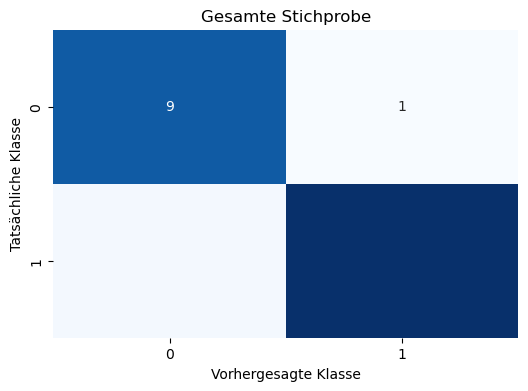

In [3]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, 
    precision_recall_fscore_support, precision_score
)
from collections import defaultdict, Counter
from IPython.display import display, HTML

optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled

def optimize_hyperparameters_and_features(X, y):
    def objective(trial):
        # Optimiere C mit L1-Regularisierung
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        model = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=500)

        # RFECV zur gleichzeitigen Feature-Selektion mit 5-facher Cross-Validation
        selector = RFECV(model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
        selector.fit(X, y)

        # Mittlerer ROC-AUC Score
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc", n_jobs=-1))

        return score  # Optuna maximiert diesen Wert

    # Optuna-Studie mit Hyperparameter- und Feature-Optimierung
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, n_jobs=-1)

    # Beste Parameter und Features extrahieren
    best_params = {"C": study.best_params["C"], "penalty": "l1", "solver": "liblinear"}
    best_model = LogisticRegression(**best_params, max_iter=500)
    best_selector = RFECV(best_model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
    best_selector.fit(X, y)

    return best_params, X.iloc[:, best_selector.support_], best_selector


def nested_cross_validation(X, y):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    metrics = defaultdict(list)
    cumulative_cm = np.zeros((2, 2))  # Zum Aufsummieren der Confusion Matrices
    best_hyperparameters = []
    selected_features = []

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_params, X_train_selected, best_selector = optimize_hyperparameters_and_features(X_train, y_train)
        best_hyperparameters.append(best_params["C"])
        selected_features.append(list(X_train_selected.columns))
        X_test_selected = X_test[X_train_selected.columns]

        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Berechnung der ursprünglichen Metriken
        metrics["train_accuracy_0"].append(accuracy_score(y_train[y_train == 0], y_train_pred[y_train == 0]))
        metrics["train_accuracy_1"].append(accuracy_score(y_train[y_train == 1], y_train_pred[y_train == 1]))
        metrics["test_accuracy_0"].append(accuracy_score(y_test[y_test == 0], y_test_pred[y_test == 0]))
        metrics["test_accuracy_1"].append(accuracy_score(y_test[y_test == 1], y_test_pred[y_test == 1]))
        
        metrics["f1_score_0"].append(f1_score(y_test, y_test_pred, pos_label=0))
        metrics["f1_score_1"].append(f1_score(y_test, y_test_pred, pos_label=1))
        metrics["recall_0"].append(recall_score(y_test, y_test_pred, pos_label=0))
        metrics["recall_1"].append(recall_score(y_test, y_test_pred, pos_label=1))
        metrics["roc_auc_0"].append(roc_auc_score(y_test, y_test_pred))
        metrics["roc_auc_1"].append(roc_auc_score(y_test, y_test_prob))
        
        # Neue Metriken für macro, micro, weighted
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average=None)
        
        metrics["precision_macro"].append(precision.mean())
        metrics["recall_macro"].append(recall.mean())
        metrics["f1_macro"].append(f1.mean())
        metrics["precision_micro"].append(precision_score(y_test, y_test_pred, average='micro'))
        metrics["recall_micro"].append(recall_score(y_test, y_test_pred, average='micro'))
        metrics["f1_micro"].append(f1_score(y_test, y_test_pred, average='micro'))
        metrics["precision_weighted"].append(precision_score(y_test, y_test_pred, average='weighted'))
        metrics["recall_weighted"].append(recall_score(y_test, y_test_pred, average='weighted'))
        metrics["f1_weighted"].append(f1_score(y_test, y_test_pred, average='weighted'))
        
        # Confusion Matrix korrekt berechnen und aufsummieren
        cumulative_cm += confusion_matrix(y_test, y_test_pred)

    # Durchschnittliche Metriken und Standardabweichung berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    
    # Gemittelte Confusion Matrix berechnen
    avg_cm = cumulative_cm / len(list(outer_cv.split(X, y)))

    # Durchschnittlicher Hyperparameter (C)
    avg_C = np.mean(best_hyperparameters)

    # Häufigste Features berechnen
    flat_selected_features = [feature for sublist in selected_features for feature in sublist]
    most_common_features = Counter(flat_selected_features).most_common()

    return avg_metrics, avg_cm, avg_C, most_common_features


def print_metrics(avg_metrics):
    df = pd.DataFrame({
        "Gruppe": ["0 (Unverletzte)", "1 (Verletzte)", "Macro", "Micro", "Weighted"],
        "Train Accuracy": [
            f"{avg_metrics['train_accuracy_0'][0]*100:.2f} ± {avg_metrics['train_accuracy_0'][1]*100:.2f}",
            f"{avg_metrics['train_accuracy_1'][0]*100:.2f} ± {avg_metrics['train_accuracy_1'][1]*100:.2f}",
            "-", "-", "-"
        ],
        "Test Accuracy": [
            f"{avg_metrics['test_accuracy_0'][0]*100:.2f} ± {avg_metrics['test_accuracy_0'][1]*100:.2f}",
            f"{avg_metrics['test_accuracy_1'][0]*100:.2f} ± {avg_metrics['test_accuracy_1'][1]*100:.2f}",
            "-", "-", "-"
        ],
        "F1 Score": [
            f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
            f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}",
            f"{avg_metrics['f1_macro'][0]*100:.2f} ± {avg_metrics['f1_macro'][1]*100:.2f}",
            f"{avg_metrics['f1_micro'][0]*100:.2f} ± {avg_metrics['f1_micro'][1]*100:.2f}",
            f"{avg_metrics['f1_weighted'][0]*100:.2f} ± {avg_metrics['f1_weighted'][1]*100:.2f}"
        ],
        "Recall": [
            f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
            f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}",
            f"{avg_metrics['recall_macro'][0]*100:.2f} ± {avg_metrics['recall_macro'][1]*100:.2f}",
            f"{avg_metrics['recall_micro'][0]*100:.2f} ± {avg_metrics['recall_micro'][1]*100:.2f}",
            f"{avg_metrics['recall_weighted'][0]*100:.2f} ± {avg_metrics['recall_weighted'][1]*100:.2f}"
        ],
        "Precision": [
            "-", "-",
            f"{avg_metrics['precision_macro'][0]*100:.2f} ± {avg_metrics['precision_macro'][1]*100:.2f}",
            f"{avg_metrics['precision_micro'][0]*100:.2f} ± {avg_metrics['precision_micro'][1]*100:.2f}",
            f"{avg_metrics['precision_weighted'][0]*100:.2f} ± {avg_metrics['precision_weighted'][1]*100:.2f}"
        ],
        "ROC-AUC": [
            f"{avg_metrics['roc_auc_0'][0]*100:.2f} ± {avg_metrics['roc_auc_0'][1]*100:.2f}",
            f"{avg_metrics['roc_auc_1'][0]*100:.2f} ± {avg_metrics['roc_auc_1'][1]*100:.2f}",
            "-", "-", "-"
        ]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{ "selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")] }]) \
                    .set_caption("Durchschnittliche Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Gemittelte Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def print_feature_importance_table(most_common_features):
    # DataFrame erstellen, um die häufigsten Features anzuzeigen
    feature_importance_df = pd.DataFrame(most_common_features, columns=["Feature", "Häufigkeit"])

    # Tabelle mit dem gleichen Design wie bei den Metriken erstellen
    styled_df = feature_importance_df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")]}]) \
                    .set_caption("Häufigste Features")

    # Ausgabe der Tabelle
    display(styled_df)


def main():
    file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_C, most_common_features = nested_cross_validation(X, y)
    
    # Häufigste Features über alle Folds
    print_feature_importance_table(most_common_features)
    
    # Durchschnittlicher Hyperparameter
    print(f"Durchschnittlicher C-Wert: {avg_C:.4f}")

  
    # Print results and plot confusion matrix
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

    
if __name__ == "__main__":
    main()

In [14]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, 
    precision_recall_fscore_support, precision_score
)
from collections import defaultdict, Counter
from IPython.display import display, HTML

optuna.logging.set_verbosity(optuna.logging.WARNING)

def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    dummy_var = X["Geschlecht_weiblich"]
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    X_scaled["Geschlecht_weiblich"] = dummy_var  
    return X_scaled

def optimize_hyperparameters_and_features(X, y):
    def objective(trial):
        # Optimiere C mit L1-Regularisierung
        C = trial.suggest_float("C", 0.0001, 10.0, log=True)
        model = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=500)

        # RFECV zur gleichzeitigen Feature-Selektion mit 5-facher Cross-Validation
        selector = RFECV(model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
        selector.fit(X, y)

        # Mittlerer ROC-AUC Score
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc", n_jobs=-1))

        return score  # Optuna maximiert diesen Wert

    # Optuna-Studie mit Hyperparameter- und Feature-Optimierung
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, n_jobs=-1)

    # Beste Parameter und Features extrahieren
    best_params = {"C": study.best_params["C"], "penalty": "l1", "solver": "liblinear"}
    best_model = LogisticRegression(**best_params, max_iter=500)
    best_selector = RFECV(best_model, step=1, cv=5, scoring="roc_auc", n_jobs=-1)
    best_selector.fit(X, y)

    return best_params, X.iloc[:, best_selector.support_], best_selector


def nested_cross_validation(X, y):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    metrics = defaultdict(list)
    cumulative_cm = np.zeros((2, 2))  # Zum Aufsummieren der Confusion Matrices
    best_hyperparameters = []
    selected_features = []

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        best_params, X_train_selected, best_selector = optimize_hyperparameters_and_features(X_train, y_train)
        best_hyperparameters.append(best_params["C"])
        selected_features.append(list(X_train_selected.columns))
        X_test_selected = X_test[X_train_selected.columns]

        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train_selected, y_train)

        y_train_pred = model.predict(X_train_selected)
        y_test_pred = model.predict(X_test_selected)
        y_test_prob = model.predict_proba(X_test_selected)[:, 1]

        # Berechnung der Accuracy über alle Klassen 
        metrics["train_accuracy"].append(accuracy_score(y_train, y_train_pred))
        metrics["test_accuracy"].append(accuracy_score(y_test, y_test_pred))
        
        # Gesamt ROC-AUC über alle Klassen
        metrics["roc_auc"].append(roc_auc_score(y_test, y_test_prob))

        # Berechnung von F1-Score, Recall, Precision für die beiden Klassen 0 und 1
        f1, recall, precision, _ = precision_recall_fscore_support(y_test, y_test_pred, average=None)
        metrics["f1_score_0"].append(f1[0])
        metrics["f1_score_1"].append(f1[1])
        metrics["recall_0"].append(recall[0])
        metrics["recall_1"].append(recall[1])
        metrics["precision_0"].append(precision[0])
        metrics["precision_1"].append(precision[1])

        # Berechnung von F1-Score, Recall, Precision für macro, micro und weighted
        metrics["f1_macro"].append(f1_score(y_test, y_test_pred, average="macro"))
        metrics["f1_micro"].append(f1_score(y_test, y_test_pred, average="micro"))
        metrics["f1_weighted"].append(f1_score(y_test, y_test_pred, average="weighted"))
        
        metrics["recall_macro"].append(recall_score(y_test, y_test_pred, average="macro"))
        metrics["recall_micro"].append(recall_score(y_test, y_test_pred, average="micro"))
        metrics["recall_weighted"].append(recall_score(y_test, y_test_pred, average="weighted"))
        
        metrics["precision_macro"].append(precision_score(y_test, y_test_pred, average="macro"))
        metrics["precision_micro"].append(precision_score(y_test, y_test_pred, average="micro"))
        metrics["precision_weighted"].append(precision_score(y_test, y_test_pred, average="weighted"))


        # Confusion Matrix korrekt berechnen und aufsummieren
        cumulative_cm += confusion_matrix(y_test, y_test_pred)

    # Durchschnittliche Metriken und Standardabweichung berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}
    
    # Gemittelte Confusion Matrix berechnen
    avg_cm = cumulative_cm / len(list(outer_cv.split(X, y)))

    # Durchschnittlicher Hyperparameter (C)
    avg_C = np.mean(best_hyperparameters)

    # Häufigste Features berechnen
    flat_selected_features = [feature for sublist in selected_features for feature in sublist]
    most_common_features = Counter(flat_selected_features).most_common()

    return avg_metrics, avg_cm, avg_C, most_common_features

def print_metrics(avg_metrics):
    df = pd.DataFrame({
        "Gruppe": ["Total", "0 (Unverletzte)", "1 (Verletzte)", "Macro", "Micro", "Weighted"],
        "Train Accuracy": [
            f"{avg_metrics['train_accuracy'][0]*100:.2f} ± {avg_metrics['train_accuracy'][1]*100:.2f}",
            "-", "-", "-", "-"
        ],
        "Test Accuracy": [
            f"{avg_metrics['test_accuracy'][0]*100:.2f} ± {avg_metrics['test_accuracy'][1]*100:.2f}",
            "-", "-", "-", "-"
        ],
        "F1 Score": [
            "-",
            f"{avg_metrics['f1_score_0'][0]*100:.2f} ± {avg_metrics['f1_score_0'][1]*100:.2f}",
            f"{avg_metrics['f1_score_1'][0]*100:.2f} ± {avg_metrics['f1_score_1'][1]*100:.2f}",
            f"{avg_metrics['f1_macro'][0]*100:.2f} ± {avg_metrics['f1_macro'][1]*100:.2f}",
            f"{avg_metrics['f1_micro'][0]*100:.2f} ± {avg_metrics['f1_micro'][1]*100:.2f}",
            f"{avg_metrics['f1_weighted'][0]*100:.2f} ± {avg_metrics['f1_weighted'][1]*100:.2f}"
        ],
        "Recall": [
            "-",
            f"{avg_metrics['recall_0'][0]*100:.2f} ± {avg_metrics['recall_0'][1]*100:.2f}",
            f"{avg_metrics['recall_1'][0]*100:.2f} ± {avg_metrics['recall_1'][1]*100:.2f}",
            f"{avg_metrics['recall_macro'][0]*100:.2f} ± {avg_metrics['recall_macro'][1]*100:.2f}",
            f"{avg_metrics['recall_micro'][0]*100:.2f} ± {avg_metrics['recall_micro'][1]*100:.2f}",
            f"{avg_metrics['recall_weighted'][0]*100:.2f} ± {avg_metrics['recall_weighted'][1]*100:.2f}"
        ],
        "Precision": [
            "-", 
            f"{avg_metrics['precision_0'][0]*100:.2f} ± {avg_metrics['precision_0'][1]*100:.2f}",
            f"{avg_metrics['precision_1'][0]*100:.2f} ± {avg_metrics['precision_1'][1]*100:.2f}",
            f"{avg_metrics['precision_macro'][0]*100:.2f} ± {avg_metrics['precision_macro'][1]*100:.2f}",
            f"{avg_metrics['precision_micro'][0]*100:.2f} ± {avg_metrics['precision_micro'][1]*100:.2f}",
            f"{avg_metrics['precision_weighted'][0]*100:.2f} ± {avg_metrics['precision_weighted'][1]*100:.2f}"
        ],
        "ROC-AUC": [
            f"{avg_metrics['roc_auc'][0]*100:.2f} ± {avg_metrics['roc_auc'][1]*100:.2f}",
            f"{avg_metrics['roc_auc'][0]*100:.2f} ± {avg_metrics['roc_auc'][1]*100:.2f}",
            f"{avg_metrics['roc_auc'][0]*100:.2f} ± {avg_metrics['roc_auc'][1]*100:.2f}",
            "-", "-", "-"
        ]
    })

    styled_df = df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{ "selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")] }]) \
                    .set_caption("Durchschnittliche Evaluierungsmetriken")

    display(styled_df)

def plot_confusion_matrix(cm, title="Gemittelte Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.title(title)
    plt.show()

def print_feature_importance_table(most_common_features):
    # DataFrame erstellen, um die häufigsten Features anzuzeigen
    feature_importance_df = pd.DataFrame(most_common_features, columns=["Feature", "Häufigkeit"])

    # Tabelle mit dem gleichen Design wie bei den Metriken erstellen
    styled_df = feature_importance_df.style.set_properties(**{"text-align": "center", "color": "black"}) \
                    .set_table_styles([{"selector": "th", 
                                         "props": [("font-size", "14px"), 
                                                   ("background-color", "#f2f2f2"), 
                                                   ("color", "black")]}]) \
                    .set_caption("Häufigste Features")

    # Ausgabe der Tabelle
    display(styled_df)


def main():
    file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X = preprocess_data(X)

    # Perform nested cross-validation
    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_C, most_common_features = nested_cross_validation(X, y)
    
    # Häufigste Features über alle Folds
    print_feature_importance_table(most_common_features)
    
    # Durchschnittlicher Hyperparameter
    print(f"Durchschnittlicher C-Wert: {avg_C:.4f}")

  
    # Print results and plot confusion matrix
    print_metrics(avg_metrics)
    plot_confusion_matrix(avg_cm, title="Gesamte Stichprobe")

    
if __name__ == "__main__":
    main()


Durchführen der äußeren Cross-Validation...


,Feature,Häufigkeit
0,CMJ_maxRFD,15
1,UNINV_CMJ_uni_Av. propulsive force,14
2,INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW],13
3,INV_Arbeit_Flexion,12
4,UNINV_CMJ_uni_Braking Duration-Mittelwert [s],11
5,ISO_Drehmoment_Seitenunterschied Extension relativ,11
6,INV_Arbeit_Extension,9
7,UNINV_CMJ_uni_Rel. Peak Power,7
8,CMJ_Vertical Stiffness,7
9,INV_CMJ_uni_Peak Loading Force-Mittelwert [N],6


Durchschnittlicher C-Wert: 5.0799


ValueError: All arrays must be of the same length

In [15]:
!git pull origin master

Updating 45a2a12..6302214


From https://github.com/michi1308/ML_jupyter_notebook
 * branch            master     -> FETCH_HEAD
   45a2a12..6302214  master     -> origin/master
error: Your local changes to the following files would be overwritten by merge:
	FS_70_feature_importance.ipynb
Please commit your changes or stash them before you merge.
Aborting


In [16]:
!git add FS_70_feature_importance.ipynb

In [17]:
!git commit -m "metriken überarbeiten"

[master 0ad10f4] metriken Ã¼berarbeiten
 1 file changed, 2047 insertions(+), 865 deletions(-)


In [18]:
!git push origin master

To https://github.com/michi1308/ML_jupyter_notebook.git
 ! [rejected]        master -> master (non-fast-forward)
error: failed to push some refs to 'https://github.com/michi1308/ML_jupyter_notebook.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. If you want to integrate the remote changes,
hint: use 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [19]:
! git pull origin master --rebase

error: cannot pull with rebase: You have unstaged changes.
error: Please commit or stash them.


In [ ]:
!